In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing

In [6]:
import matplotlib
print(matplotlib.__version__)

3.1.3


## MLLytics Packages

In [7]:
from MLLytics.interpretation import make_pdp, plot_pdp

## Some model

In [8]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

print("Training MLPRegressor...")
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_train, y_train)
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training MLPRegressor...
Test R2 score: 0.79


In [9]:
#https://matplotlib.org/gallery/statistics/bxp.html
import matplotlib.cbook as cbook

# fake data
np.random.seed(19680801)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')

# compute the boxplot stats
stats = cbook.boxplot_stats(data, labels=labels, bootstrap=10000)

In [10]:
stats[0]

{'label': 'A',
 'mean': 13.608303993175577,
 'iqr': 16.62219300478486,
 'cilo': 1.411047419553718,
 'cihi': 14.255678889631325,
 'whishi': 30.32084269371291,
 'whislo': 0.019001878741670253,
 'fliers': array([44.43404261, 59.58829213, 77.10427139, 81.48295988]),
 'q1': 0.8281911963046644,
 'med': 3.650461454233603,
 'q3': 17.450384201089527}

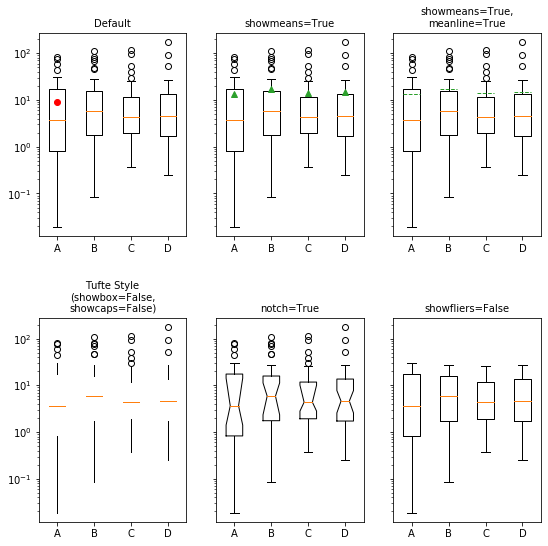

In [11]:
fs=10

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 9), sharey=True)
axs[0, 0].bxp(stats)
axs[0, 0].set_title('Default', fontsize=fs)

axs[0, 1].bxp(stats, showmeans=True)
axs[0, 1].set_title('showmeans=True', fontsize=fs)

axs[0, 2].bxp(stats, showmeans=True, meanline=True)
axs[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axs[1, 0].bxp(stats, showbox=False, showcaps=False)
tufte_title = 'Tufte Style\n(showbox=False,\nshowcaps=False)'
axs[1, 0].set_title(tufte_title, fontsize=fs)

axs[1, 1].bxp(stats, shownotches=True)
axs[1, 1].set_title('notch=True', fontsize=fs)

axs[1, 2].bxp(stats, showfliers=False)
axs[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axs.flat:
    ax.set_yscale('log')
    #ax.set_yticklabels([])

axs[0, 0].scatter(1, 9, color='red')    
    
fig.subplots_adjust(hspace=0.4)
plt.show()

[Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C'), Text(0, 0, 'Bla')]

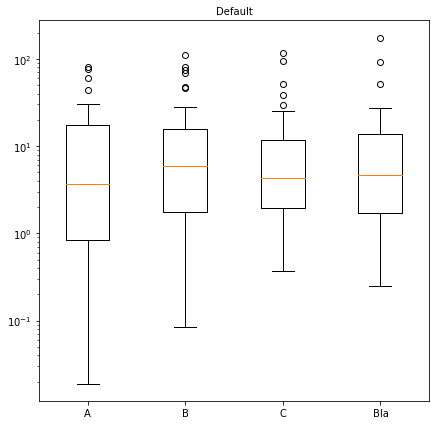

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), sharey=True)
axs.bxp(stats)
axs.set_title('Default', fontsize=fs)

axs.set_yscale('log')
axs.set_xticklabels(['A', 'B', 'C', 'Bla'])

Text(0.5, 1.0, 'Default')

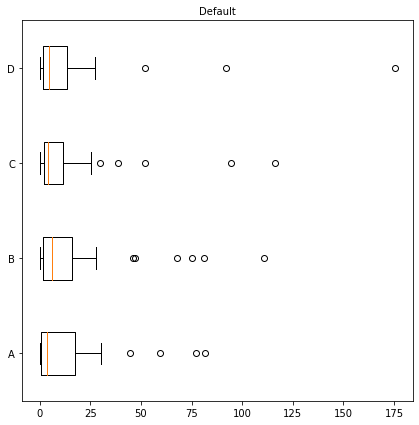

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), sharey=True)
axs.bxp(stats, vert=False)
axs.set_title('Default', fontsize=fs)

#axs.set_yscale('log')
#axs.set_xticklabels(['A', 'B', 'C', 'Bla'])

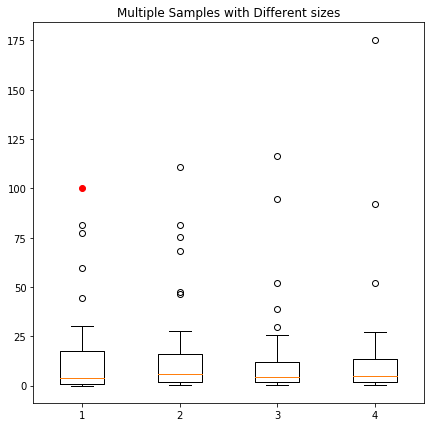

In [9]:
fig7, ax7 = plt.subplots(figsize=(7,7))
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)
ax7.scatter(1, 100, color='r')

plt.show()

## Single plot

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faba9ce3790>)

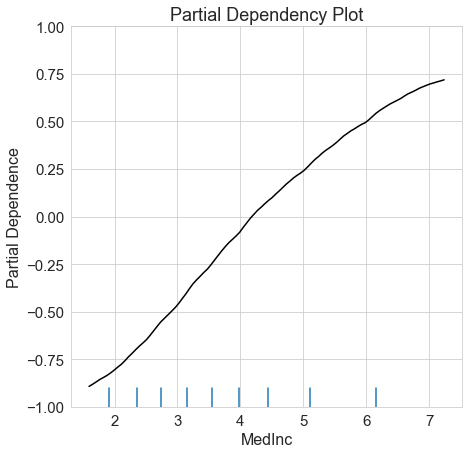

In [12]:
va, li, qtls = make_pdp(X_train, 'MedInc', est, type='regression')
keywords = {'ymin':-1, 'ymax':1}
plot_pdp('MedInc', va, li,type='regression', quantiles=qtls, norm=True, **keywords)

In [13]:
import seaborn as sns

In [12]:
X_train.sample(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1825,2.6750,33.0,4.698413,1.158730,216.0,3.428571,37.93,-122.32
9556,2.1061,16.0,4.638151,1.100295,3589.0,3.529007,37.39,-120.59


In [15]:
from MLLytics.interpretation import make_ice, plot_ice

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faba99c7850>)

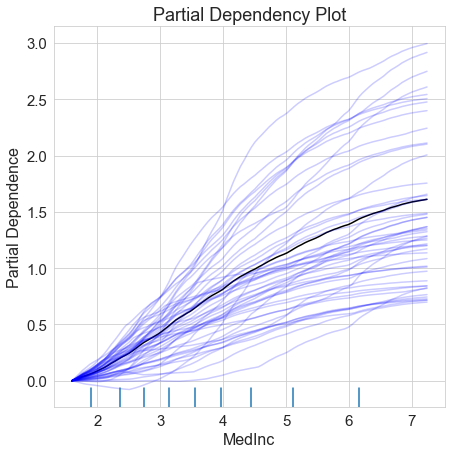

In [16]:
va, li, qtls = make_pdp(X_train, 'MedInc', est, type='regression')
va2, li2, qtls2 = make_ice(X_train, 'MedInc', est, type='regression')

plot_ice('MedInc', va, li, pd.DataFrame(li2), type='regression', quantiles=qtls, norm=True, **keywords)

## Multiple plots

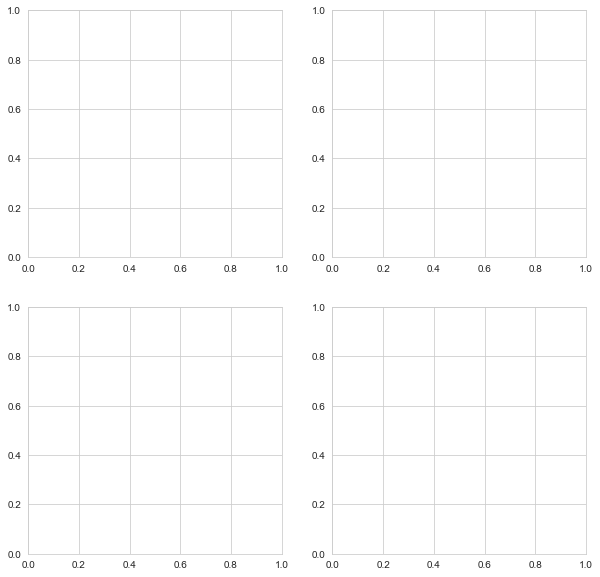

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

In [18]:
keywords = {'ymin':-1, 'ymax':1, 'title':None}

va, li, qtls = make_pdp(X_train, 'AveOccup', est, type='regression')
plot_pdp('AveOccup', va, li,type='regression', quantiles=qtls, norm=True, ylim=[-1,1], axs=axs[0][0], **keywords)

va, li, qtls = make_pdp(X_train, 'MedInc', est, type='regression')
plot_pdp('MedInc', va, li,type='regression', quantiles=qtls, norm=True, ylim=[-1,1], axs=axs[0][1], **keywords)

va, li, qtls = make_pdp(X_train, 'HouseAge', est, type='regression')
plot_pdp('HouseAge', va, li,type='regression', quantiles=qtls, norm=True, ylim=[-1,1], axs=axs[1][0], **keywords)

va, li, qtls = make_pdp(X_train, 'AveRooms', est, type='regression')
plot_pdp('AveRooms', va, li,type='regression', quantiles=qtls, norm=True, ylim=[-1,1], axs=axs[1][1], **keywords)

In [19]:
fig.suptitle("Partial Dependency plots example", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.92)


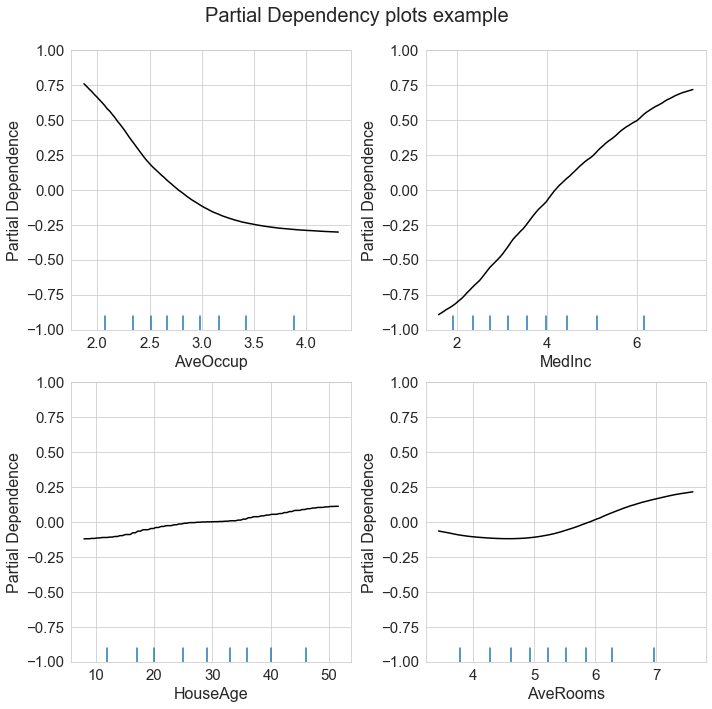

In [20]:
fig

## Edit one of the plots easily 

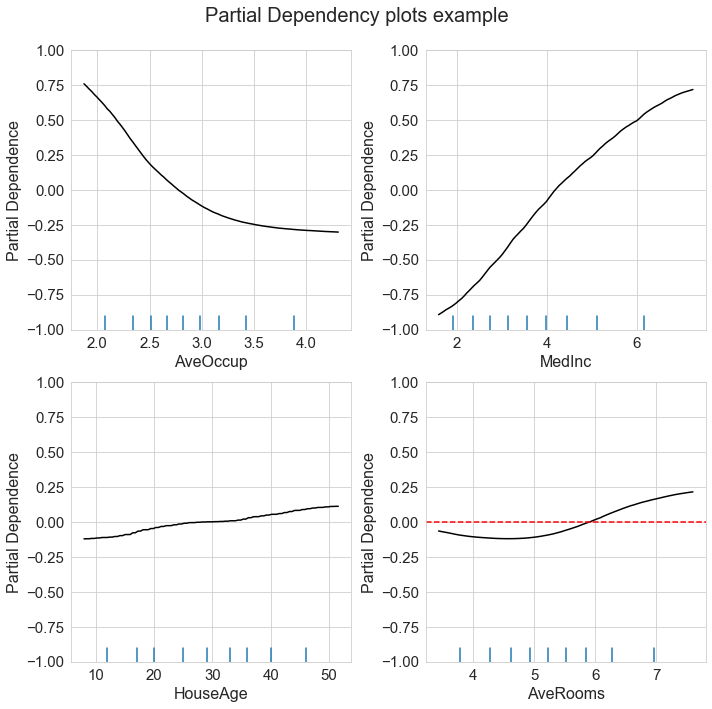

In [21]:
axs[1][1].axhline(0.0, 0, 1.0, linestyle='--', color='red')
fig